In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [83]:
#Task a

h=1
m=1
L=1.0
n=2000
grid= np.linspace(-L/2, L/2, n)


In [86]:
#task b

def Laplacian(n):
    """
    Computes the Laplacian operator based on number of points in grid.
    
    Parameters:
    n (int): Number of points on the grid. 
    
    
    Returns:
    Array: Laplacian Matrix.
    """
    I=np.identity(n)
    sup_diag=np.diag(np.ones(n-1),1)
    sub_diag=np.diag(np.ones(n-1),-1)
    I_off=sup_diag+sub_diag
    dx=(1 / (n-1))
    laplacian=(1/(dx**2))*(-2*I+I_off)
    return laplacian



In [87]:
#task c

H= (-0.5) * Laplacian(n)


In [88]:
#task d

eigenvalues, eigenvectors = np.linalg.eig(H)
sorted_indices = np.argsort(eigenvalues)
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]


first_seven_eigenvalues = sorted_eigenvalues[:7]  
first_seven_eigenvectors = eigenvectors[:, sorted_indices[:7]]




Normalization Wavefunction 1 : 1.0
Normalization Wavefunction 2 : 1.0
Normalization Wavefunction 3 : 1.0
Normalization Wavefunction 4 : 1.0
Normalization Wavefunction 5 : 1.0


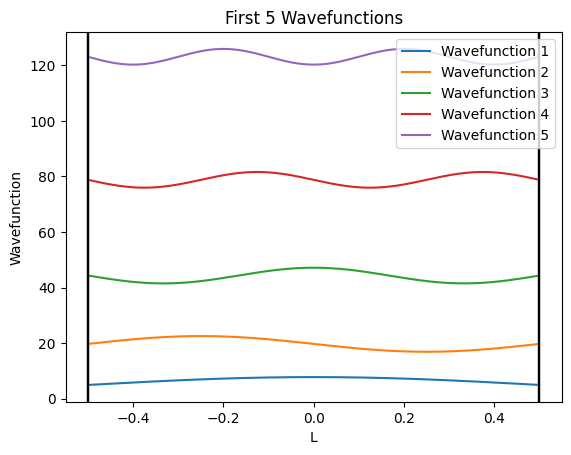

In [89]:
# Step 4: Plot the first wavefunction


x=grid
dx= (grid[1]-grid[0])
for i in range(5):
    wavefunction= -sorted_eigenvectors[:, i]
    wavefunction= wavefunction/(np.sqrt(np.sum(wavefunction**2)*dx))
    Normalization=(np.sum(wavefunction*wavefunction*dx))
    print("Normalization Wavefunction",i+1,":", Normalization)
    y=2*wavefunction+sorted_eigenvalues[i]
    plt.plot(x,y, label=f"Wavefunction {i+1}")
    plt.axvline(x=L/2, color='black', linestyle='-')
    plt.axvline(x=-L/2, color='black', linestyle='-')

plt.title("First 5 Wavefunctions")
plt.xlabel("L")
plt.ylabel("Wavefunction")
plt.legend()
plt.show()

